In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy
from scipy.stats import pearsonr, linregress
from ll_xy import lonlat_to_xy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import mask

In [2]:
sd = pickle.load(open('vol_fig.p','rb'))
diff_vols = pickle.load(open('vol_fig2.p','rb'))
a_fluxes_wkly = pickle.load(open('wklyfluxes.p','rb'))
chuc_feb_vol = pickle.load(open('chuk.p', 'rb'))
gate_dict = pickle.load(open('../pickles/gd.p','rb'))
myi_areas = pickle.load(open('../pickles/beaufort_myi_frac.p', 'rb'))
p_vols = pickle.load(open('../pickles/survival_zone.p','rb'))
fracs = pickle.load(open('../pickles/myi_frac_flux.p','rb'))

corr_d = pickle.load(open('corr_d.p','rb'))
flux_series, ann_means = corr_d

sz = pickle.load(open('../pickles/sz.p','rb'))
ease_x, ease_y = lonlat_to_xy(mask.get('lon'), mask.get('lat'), hemisphere='n')

vunits = r'(10$^3$ km$^3$)'

/home/robbie/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


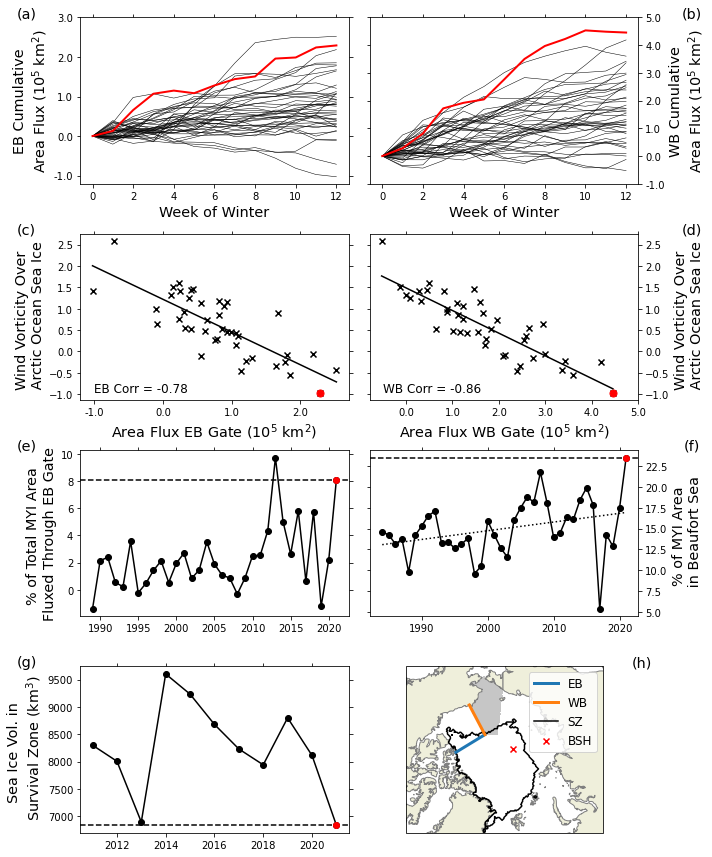

In [3]:
fig, axs = plt.subplots(4,2,figsize=(10,15))

ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8 = axs.reshape(-1)

### TOP ROW ###

aunits = r'10$^5$ km$^2$'

years = range(1980,2022)

for gate, ax, name in zip(['East Beaufort', 'West Beaufort'],[ax1,ax2], ['EB','WB']):

    for year in years:
        if year != 2021:
            color='k'
            lw=0.5
        elif year == 2021:
            color = 'r'
            lw=2

#         if year == 2018: color = 'b'

        ax.plot(np.arange(13),[0]+list(np.cumsum(a_fluxes_wkly[gate][year])), color=color, lw=lw)

    ax.set_ylabel(f'{name} Cumulative\nArea Flux ({aunits})', fontsize='x-large')
    ax.set_xlabel(f'Week of Winter', fontsize='x-large')
    
ax1.set_yticks(np.arange(-1e5,3e5+1,1e5))
ax1.set_yticklabels(np.arange(-1,3+0.1,1))

ax2.set_yticks(np.arange(-1e5,5e5+0.1,1e5))
ax2.set_yticklabels(np.arange(-1,5+0.1,1))
    
### SECOND ROW ##################################

axl, axr = ax3, ax4

axl.scatter(flux_series['East Beaufort'], ann_means,color='k', marker='x', label='1979-2020 EB')
axr.scatter(flux_series['West Beaufort'], ann_means,color='k', marker='x', label='1979-2020 WB')

axl.scatter(flux_series['East Beaufort'][-1], ann_means[-1],color='r', marker='o',s=50, label='2021 EB')
axr.scatter(flux_series['West Beaufort'][-1], ann_means[-1],color='r', marker='o',s=50, label='2021 WB')

z = np.polyfit(flux_series['East Beaufort'], ann_means, 1)
p = np.poly1d(z)
axl.plot([min(flux_series['East Beaufort']),max(flux_series['East Beaufort'])],
       p([min(flux_series['East Beaufort']),max(flux_series['East Beaufort'])]),color='k',ls='-')

z = np.polyfit(flux_series['West Beaufort'], ann_means, 1)
p = np.poly1d(z)
axr.plot([min(flux_series['West Beaufort']),max(flux_series['West Beaufort'])],
       p([min(flux_series['West Beaufort']),max(flux_series['West Beaufort'])]),
       color='k',ls='-',marker='None')

for ax, name in zip([axl,axr], ['EB','WB']):
    ax.set_xlabel(f'Area Flux {name} Gate ({aunits})', fontsize='x-large')
    ax.set_ylabel('Wind Vorticity Over \n Arctic Ocean Sea Ice', fontsize='x-large')


ebcorr = np.round(pearsonr(flux_series['East Beaufort'], ann_means)[0], decimals=2)
wbcorr = np.round(pearsonr(flux_series['West Beaufort'], ann_means)[0], decimals=2)

axl.annotate(text=f'EB Corr = {ebcorr}',xy=(0.05,0.05),
             xycoords='axes fraction', fontsize='large', color='k')
axr.annotate(text=f'WB Corr = {wbcorr}',
             xy=(0.05,0.05),xycoords='axes fraction', fontsize='large', color='k')

axl.set_xticks(np.arange(-1e5,2e5+1,1e5))
axl.set_xticklabels(np.arange(-1,2+0.1,1))

axr.set_xticks(np.arange(0,5e5+0.1,1e5))
axr.set_xticklabels(np.arange(0,5+0.1,1))


### THIRD ROW ######################################


ax = ax5

ax.plot(range(1989,2022),fracs,color='k',marker='o')
ax.scatter(2021,fracs[-1],marker='o',color='r',zorder=6)
ax.axhline(fracs[-1],color='k',ls='--')
ax.set_ylabel('% of Total MYI Area \nFluxed Through EB Gate', fontsize='x-large')


ax = ax6


ax.plot(np.arange(1984,2022),np.array(myi_areas[:])*100,color='k', marker='o')

lg = linregress(np.arange(1984,2022),np.array(myi_areas[:])*100)
ax.plot([1984,2021],[1984*lg[0]+lg[1],2021*lg[0]+lg[1]],color='k',ls=':')

ax.scatter(2021,np.array(myi_areas)[-1]*100,color='r',marker='o',zorder=5)

ax.axhline(myi_areas[-1]*100,color='k',ls='--')

ax.set_ylabel('% of MYI Area \n in Beaufort Sea', fontsize='x-large')

### BOTTOM LEFT ###

ax = ax7

ax.plot(range(2011,2022),p_vols, color='k',marker='o')
km3 = r'km$^3$'
ax.set_ylabel(f'Sea Ice Vol. in \n Survival Zone ({km3})',fontsize='x-large')
ax.scatter(2021,p_vols[-1], color='r',marker='o',zorder=3)
ax.axhline(p_vols[-1],ls='--',color='k')

### BOTTOM RIGHT ###

ax8.remove()

ax8 = fig.add_subplot(4,2,8,projection=ccrs.NorthPolarStereo())

ax = ax8

ax.scatter([160.0], [82.75], transform=ccrs.PlateCarree(),color='r',marker='x',label= "BSH")

ax.add_feature(cartopy.feature.LAND, edgecolor='gray',zorder=1)

for gate, name in zip(['East Beaufort','West Beaufort'],['EB','WB']):
    
    point1, point2 = gate_dict[gate]['end_points']
    
#     print(point1)

    ax.plot([point1.x, point2.x],[point1.y, point2.y],
#              color='k',
#              ls=':',
             lw=3,
             label=name)


chuk = mask.select_region('Chukchi',np.ones((361,361)))
ax.pcolormesh(mask.get('lon'),mask.get('lat'),chuk[:-1,:-1],transform=ccrs.PlateCarree(),cmap='Greys_r',vmin=0,vmax=1.5,label='Chuk')
    
ax.set_extent([-2.633e+06,
               2.696e+06,
               -1.5e6,
               3e+06],
              crs=ccrs.NorthPolarStereo()) 


ax.annotate(text=f'(h)',xy=(1.2,1),xycoords='axes fraction', fontsize='x-large',ha='center')

ax.plot([],[],color='k',label='SZ')

ax.contour(ease_x,
            ease_y,
            sz,
            transform=ccrs.epsg('3408'),
            levels=[1],
            colors='k',
#             label='SZ',
)


ax.legend(loc='upper right', fontsize='large')


#########################################

plt.subplots_adjust(wspace=0.08,hspace=0.3)

for ax in (ax1,ax2,ax3,ax4,ax5,ax6,ax7):
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
for ax in (ax2,ax4,ax6):
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax.yaxis.set_ticks_position('both')
for ax in axs.reshape(-1):
    ax.set_facecolor('none')
    
switcher = 1
for ax, letter in zip(axs.reshape(-1),['a','b','c','d','e','f','g','h']):
    
    x = -0.2 if switcher>0 else 1.2
    ax.annotate(text=f'({letter})',xy=(x,1),xycoords='axes fraction', fontsize='x-large',ha='center')
    switcher = switcher *-1
    
overleaf_dir = '/home/robbie/Dropbox/Apps/Overleaf/Beaufort'
plt.savefig(f'{overleaf_dir}/fig2.jpg',dpi=500,bbox_inches='tight')

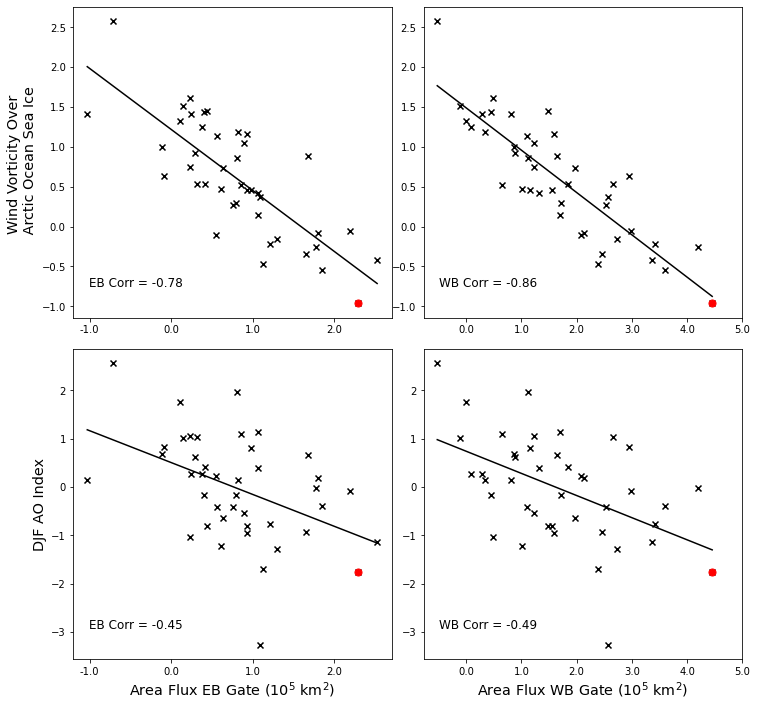

In [5]:
aos = pickle.load(open('../figure1_current/djf_mean_AOs.p','rb'))


fig, ((axl,axr), (axl_b,axr_b)) = plt.subplots(2,2, figsize=(12,12))

axl.scatter(flux_series['East Beaufort'], ann_means,color='k', marker='x', label='1979-2020 EB')
axr.scatter(flux_series['West Beaufort'], ann_means,color='k', marker='x', label='1979-2020 WB')

axl.scatter(flux_series['East Beaufort'][-1], ann_means[-1],color='r', marker='o',s=50, label='2021 EB')
axr.scatter(flux_series['West Beaufort'][-1], ann_means[-1],color='r', marker='o',s=50, label='2021 WB')

z = np.polyfit(flux_series['East Beaufort'], ann_means, 1)
p = np.poly1d(z)
axl.plot([min(flux_series['East Beaufort']),max(flux_series['East Beaufort'])],
       p([min(flux_series['East Beaufort']),max(flux_series['East Beaufort'])]),color='k',ls='-')

z = np.polyfit(flux_series['West Beaufort'], ann_means, 1)
p = np.poly1d(z)
axr.plot([min(flux_series['West Beaufort']),max(flux_series['West Beaufort'])],
       p([min(flux_series['West Beaufort']),max(flux_series['West Beaufort'])]),
       color='k',ls='-',marker='None')

# for ax, name in zip([axl,axr], ['EB','WB']):
#     ax.set_xlabel(f'Area Flux {name} Gate ({aunits})', fontsize='x-large')

axl.set_ylabel('Wind Vorticity Over \n Arctic Ocean Sea Ice', fontsize='x-large')


ebcorr = np.round(pearsonr(flux_series['East Beaufort'], ann_means)[0], decimals=2)
wbcorr = np.round(pearsonr(flux_series['West Beaufort'], ann_means)[0], decimals=2)

axl.annotate(text=f'EB Corr = {ebcorr}\n',
               xy=(0.05,0.05), xycoords='axes fraction', fontsize='large', color='k')
axr.annotate(text=f'WB Corr = {wbcorr}\n',
             xy=(0.05,0.05),xycoords='axes fraction', fontsize='large', color='k')
axl.set_xticks(np.arange(-1e5,2e5+1,1e5))
axl.set_xticklabels(np.arange(-1,2+0.1,1))

axr.set_xticks(np.arange(0,5e5+0.1,1e5))
axr.set_xticklabels(np.arange(0,5+0.1,1))


#################################


axl_b.scatter(flux_series['East Beaufort'], aos,color='k', marker='x', label='1979-2020 EB')
axr_b.scatter(flux_series['West Beaufort'], aos,color='k', marker='x', label='1979-2020 WB')

axl_b.scatter(flux_series['East Beaufort'][-1], aos[-1],color='r', marker='o',s=50, label='2021 EB')
axr_b.scatter(flux_series['West Beaufort'][-1], aos[-1],color='r', marker='o',s=50, label='2021 WB')

z = np.polyfit(flux_series['East Beaufort'], aos, 1)
p = np.poly1d(z)
axl_b.plot([min(flux_series['East Beaufort']),max(flux_series['East Beaufort'])],
       p([min(flux_series['East Beaufort']),max(flux_series['East Beaufort'])]),color='k',ls='-')

z = np.polyfit(flux_series['West Beaufort'], aos, 1)
p = np.poly1d(z)
axr_b.plot([min(flux_series['West Beaufort']),max(flux_series['West Beaufort'])],
       p([min(flux_series['West Beaufort']),max(flux_series['West Beaufort'])]),
       color='k',ls='-',marker='None')

for ax, name in zip([axl_b,axr_b], ['EB','WB']):
    ax.set_xlabel(f'Area Flux {name} Gate ({aunits})', fontsize='x-large')
    
    
    
axl_b.set_ylabel('DJF AO Index', fontsize='x-large')


ebcorr = np.round(pearsonr(flux_series['East Beaufort'], aos)[0], decimals=2)
wbcorr = np.round(pearsonr(flux_series['West Beaufort'], aos)[0], decimals=2)

axl_b.annotate(text=f'EB Corr = {ebcorr}\n',
               xy=(0.05,0.05), xycoords='axes fraction', fontsize='large', color='k')
axr_b.annotate(text=f'WB Corr = {wbcorr}\n',
             xy=(0.05,0.05),xycoords='axes fraction', fontsize='large', color='k')

axl_b.set_xticks(np.arange(-1e5,2e5+1,1e5))
axl_b.set_xticklabels(np.arange(-1,2+0.1,1))

axr_b.set_xticks(np.arange(0,5e5+0.1,1e5))
axr_b.set_xticklabels(np.arange(0,5+0.1,1))

plt.subplots_adjust(wspace=0.1,hspace=0.1)

overleaf_dir = '/home/robbie/Dropbox/Apps/Overleaf/Beaufort/Sup_figs'
plt.savefig(f'{overleaf_dir}/AO_vort_comparison.jpg',dpi=500,bbox_inches='tight')

In [15]:
myi_areas[-1]

0.2351944660125644

# Old regressions

In [7]:
axl.scatter(ann_means,flux_series['East Beaufort'],color='k', marker='x', label='1979-2020 EB')
axr.scatter(ann_means,flux_series['West Beaufort'],color='k', marker='x', label='1979-2020 WB')

axl.scatter(ann_means[-1], flux_series['East Beaufort'][-1], color='r', marker='o',s=50, label='2021 EB')
axr.scatter(ann_means[-1], flux_series['West Beaufort'][-1], color='r', marker='o',s=50, label='2021 WB')

z = np.polyfit(ann_means, flux_series['East Beaufort'], 1)
p = np.poly1d(z)
axl.plot([min(ann_means),max(ann_means)],
       p([min(ann_means),max(ann_means)]),color='k',ls='-')

z = np.polyfit(ann_means, flux_series['West Beaufort'], 1)
p = np.poly1d(z)
axr.plot([min(ann_means),max(ann_means)],
       p([min(ann_means),max(ann_means)]),
       color='k',ls='-',marker='None')

for ax, name in zip([axl,axr], ['EB','WB']):
    ax.set_ylabel(f'Area Flux {name} \n Gate ({aunits})', fontsize='x-large')
    
axr.annotate(text='Wind Vorticity Over Arctic Ocean Sea Ice',
             xy=(0.5,-0.2), xycoords='axes fraction', 
             ha='right' , fontsize='x-large')

Text(0.5, -0.2, 'Wind Vorticity Over Arctic Ocean Sea Ice')

In [17]:
np.nanmedian(chuc_feb_vol)

8.508777036026641

# Old chukchi code

[Text(2011, 0, '2011'),
 Text(2012, 0, '2012'),
 Text(2013, 0, '2013'),
 Text(2014, 0, '2014'),
 Text(2015, 0, '2015'),
 Text(2016, 0, '2016'),
 Text(2017, 0, '2017'),
 Text(2018, 0, '2018'),
 Text(2019, 0, '2019'),
 Text(2020, 0, '2020'),
 Text(2021, 0, '2021')]

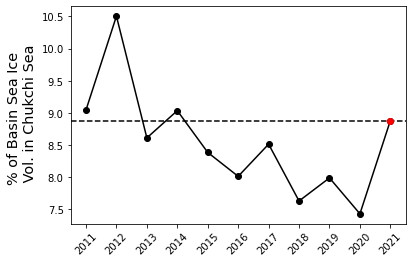

In [6]:
fig, ax = plt.subplots(1,1)

linregress(np.arange(2011,2021), chuc_feb_vol[:-1])

ax.plot(np.arange(2011,2022), chuc_feb_vol[:],marker='o',color='k')
ax.scatter(2021, chuc_feb_vol[-1],color='r',zorder=4)
ax.axhline(chuc_feb_vol[-1],color='k',ls='--')

# z = np.polyfit(np.arange(2011,2021), chuc_feb_vol[:-1], 1)
# p = np.poly1d(z)
# ax.plot(np.arange(2011,2021), p(np.arange(2011,2021)),color='k',ls='--')

# stats = linregress(np.arange(2011,2021), chuc_feb_vol[:-1])

# ax.annotate(text=f'slope = {np.round(stats[0],decimals=3)}\np val = {np.round(stats[3],decimals=4)}',
#              xy=(0.05,0.1),
#              fontsize='large',
#              xycoords='axes fraction')

ax.set_ylabel('% of Basin Sea Ice \n Vol. in Chukchi Sea', fontsize='x-large')
# ax.set_xlabel('Year', fontsize='x-large')

ax.set_xticks(np.arange(2011,2022))
ax.set_xticklabels(np.arange(2011,2022),rotation=45)